
# Kierros 2 kubitit ja operaattorit

Palautus KE 15.3.2023 klo 16.15. 

$$\renewcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\renewcommand{\bra}[1]{\left\langle{#1}\right|}$$

Kierroksella tutkitaan miten erilaisten kvanttiporttien operaatiot vaikuttavat kubitin kvanttitilaa esittävään tilavektoriin Blochin pallolla. Sen takia on tärkeää tutkia tehtävien ratkaisuja myös [Blochin palloa kuvaavan simulaation avulla.](https://bloch.ollpu.fi)

## Sisältö

- Kubitin tila ket-vektorina
- Operaattorit, X- eli NOT-operaattori



Lisätehtävänä hiihtolomalla on myös lukea kierroksen 1 tehtävänä olleen artikkelin <a href="https://drive.google.com/file/d/1O9ZhyggdZhNQS9JIg7TlcIls_mdM4zAi/view?usp=sharing" target="_blank">
 Skrolli-lehden artikkeli "Kvantit horisontissa" </a>. Näin ymmärryksesi kvanttitietokoneiden toiminnasta ja sovelluksista kasvaa.

In [11]:
import matplotlib.pyplot as plt
# jos käytät vscodea ja tarvitset pimeän väriteeman niin poista # kommenttimerkki
plt.style.use('dark_background')

## Kubitin tila ket-vektorina

Kvanttitietokoneen muistissa tieto esitetään kubittien avulla. Kvanttimekaniikassa on tapana käyttä _Diracin notaatiota_ esittämään kvanttitiloja.

Määrittelemme kubitin laskennalliset kantatilat 0 ja 1 seuraavasti:

$$
\begin{align}
\ket 0 &= \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\
\ket 1 &= \begin{pmatrix} 0 \\ 1 \end{pmatrix}.
\end{align}
$$

> Huomaa, että luvut $0$ ja $1$ ovat kompleksilukuja. Tulemme käsittelemään kompleksilukuja ja kompleksimatriiseja myöhemmin kurssilla.

$\ket 0$ lausutaan "ket nolla", ja se vastaa kubitin nollatilaa.

Diracin notaatiossa on myös toisenlainen vektori, "bra"-vektori, joka piirretään seuraavasti:
$$\bra 0$$

Ket ja bra vektorien erot selitetään myöhemmin. Tärkeää on tässä vaiheessa vain tietää, että kubitin tilat ovat vektoreita.

### Lisämateriaalia

Jos haluat tutustua syvemmin aiheeseen, lue tämä [Qiskitin artikkeli.](https://qiskit.org/textbook/ch-states/representing-qubit-states.html)

## Blochin pallo

Blochin pallo on yleinen tapa visualisoida yhden kubitin tila kolmiulotteisen pallon pinnalla.

> Huomaa, että vektorit Blochin pallolla, eli Blochin vektorit, eivät täydellisesti vastaa tilavektoreita. Tilavektoreita on silti käytännöllistä ajatella pisteinä pallon kuorella, koska operaattorit, joista opimme seuraavaksi, ovat intuitiivisesti esitettävissä pallon ympäri pyörityksinä.

Blochin pallolla pohjoisnapa vastaa tilaa $\ket 0$ ja etelänapa tilaa $\ket 1$. Vektorien $\ket 0$ ja $\ket 1$ välinen kulma on $90°$, joka vastaa Blochin pallolla $180°$ kulmaa. Alla on tilojen $\ket 0$ ja $\ket 1$ esitys Blochin pallolla.

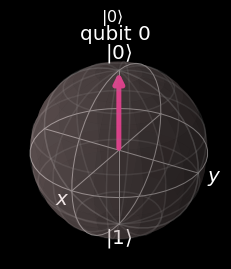

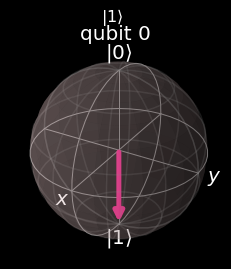

In [42]:
import numpy as np
from qiskit import *
from qiskit.quantum_info import *
from qiskit.visualization import plot_bloch_multivector

zero = np.matrix([[1], [0]])
one = np.matrix([[0], [1]])

display(plot_bloch_multivector(Statevector(zero), title="$|0\\rangle$"))
display(plot_bloch_multivector(Statevector(one), title="$|1\\rangle$"))

## Operaattorit

Operaattorit ovat kuin funktiota kvanttimekaniikassa, joilla pystytään kuvaamaan tila toiseksi tilaksi.

Operaattoreita kutsutaan kvanttilaskennassa _porteiksi_, mutta jokaiselle operaattorille ei välttämättä löydy porttia kyseisestä kvanttitietokoneesta (tai simulaatiomallista). Myöhemmin opimme, että koko kvanttipiirin toimintaa voi kuvata yhdellä operaattorilla.

Operaattorit ovat _lineaarikuvauksia_. Koska kompleksivektorien lineaarikuvauksia on hieman vaikea havainnollistaa visuaalisesti, on hyödyllisempää ajatella niitä pyörityksinä Blochin pallolla.

> Blochin pallo toimii analogiana vain yhden kubitin tiloille ja operaattoreille. Kun siirrymme usean kubitin järjestelmiin, joudumme perustamaan intuitiomme matriisilaskentaan.

### NOT-operaattori $X$

Kun $X$-portti operoi kubittiin, niin kubitin tila muuttuu sen loogiseksi negaatioksi, eli

$$
X\ket 0 = \ket 1 \\
X\ket 1 = \ket 0
$$

$X$-operaattorin käänteisoperaattori $X^{-1}$ on $X$, koska kaksi $180°$ kiertoa minkä tahansa akselin ympäri vastaa $0°$ kiertoa, eli identiteettioperaattoria $I$. Identiteettioperaattori kuvaa tilavektorista $\ket \psi$ saman:

$$ I\ket \psi = \ket \psi $$

> Kreikkalaista kirjainta psii ($\psi$) käytetään laajasti kvanttilaskennassa tilavektorin nimenä.

$$ 
\begin{array}{rllllll}
& XX & = I \\
\Rightarrow & XX\ket \psi & = \ket \psi
\end{array}
$$

Voit kokeilla eri standardioperaattoreita [tässä demossa](https://bloch.ollpu.fi) tai [tässä demossa.](https://javafxpert.github.io/grok-bloch/)

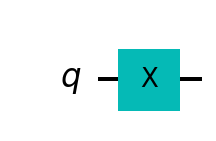

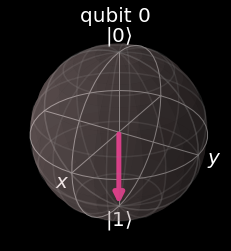

In [26]:
# Luodaan uusi kvanttipiiri, joka koostuu yhdestä kubitista
circuit = QuantumCircuit(1)

# Operoidaan kubittia 0, eli piirin ainoaa kubittia X-portilla
circuit.x(0)

# Piirretään aikaansaatu kvanttipiiri
# Parametri output="mpl" kertoo, että piirto tapahtuu graafisesti
display(circuit.draw(output="mpl", scale=2))

# Piirretään piirin lopullinen kvanttitila Blochin pallolla
result = execute(circuit, Aer.get_backend("statevector_simulator")).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

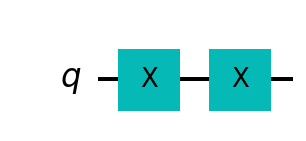

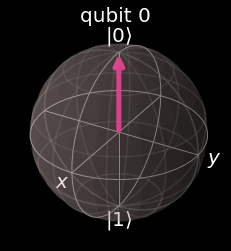

In [27]:
circuit = QuantumCircuit(1)

# Kaksi X operaattoria kumoavat toisensa
circuit.x(0)
circuit.x(0)

display(circuit.draw(output="mpl", scale=2))
result = execute(circuit, Aer.get_backend("statevector_simulator")).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

## Superpositio

Superpositiolla tarkoitetaan lineaarikombinaatiota kantatiloista. Kantatilat voivat esimerkiksi olla $\ket 0$ ja $\ket 1$, eli laskennalliset kantatilat.

### Kubitin yleinen tila

Kubitti $\ket q$ (joka ei ole _lomittunut_ ympäristönsä kanssa) voidaan esittää lineaarikombinaationa seuraavasti:

$$
\ket q = \alpha \ket 0 + \beta \ket 1 \\
\alpha, \beta \in \mathbb C
$$

Kantatilojen kertoimia $\alpha$ ja $\beta$ sanotaan tilan _amplitudeiksi_. Amplitudeilla on erittäin tärkeä rajoite: _normalisaatio_. Normalisaatio tarkoittaa, että tilavektorin pituus on oltava $1$. Tämä rajoite voidaan kirjoittaa seuraavasti:

$$ |\alpha|^2 + |\beta|^2 = 1 $$

> Tämä kaava saadaan laskemalla sisätulo $\braket {\psi | \psi}$, jonka käsittelemme konjugaattitranspoosin yhteydessä. Kompleksiluvun itseisarvo $|\cdot|$ käsitellään myöhemmin.

### Lomittuminen on luonnollinen resurssi

Lomittuminen on kvanttifysiikan ilmiö, joka on samalla kvanttilaskennan tärkein resurssi. Lomittuminen mahdollistaa suuren korrelaation kaukana toisistaan olevien kvanttijärjestelmien _mittausten_ välillä, joka on klassisen mekaniikan mukaan mahdotonta.

Kaikki tärkeät kvanttilaskennan algoritmit käyttävät lomittumista hyödyksi.

### Tilat $\ket +$ ja $\ket -$

Yleisimmät laskennallisen kannan superpositiotilat ovat $\ket +$ ja $\ket -$. Ne muodostuvat yhtä suurista osista $\ket 0$ ja $\ket 1$ tiloja, ja voidaankin ajatella niiden olevan näiden kantatilojen välissä.

$$
\begin{array}{rll}
\ket + & = & \frac{1}{\sqrt 2}\left(\ket 0 {\color{red}+} \ket 1\right) \\
\ket - & = & \frac{1}{\sqrt 2}\left(\ket 0 {\color{red}-} \ket 1\right)
\end{array}
$$

Tilat kelpaavat kvanttitiloiksi, koska ne ovat normalisoituja.

Osoitetaan, että $\ket -$ on normalisoitu:

$$
\begin{array}{rll}
\alpha &= \frac{1}{\sqrt 2} \\
\beta &= -\frac{1}{\sqrt 2} \\
\end{array}
$$

$$
\begin{array}{rccc}
& \left|\frac{1}{\sqrt 2}\right|^2 &+& \left|-\frac{1}{\sqrt 2}\right|^2 \\
=& \frac{1}{2} &+& \frac{1}{2}
\end{array}
$$

Seuraavassa koodinpätkässä näemme $\ket +$ ja $\ket -$ tilat Blochin pallolla.

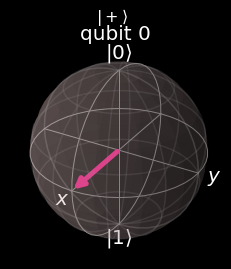

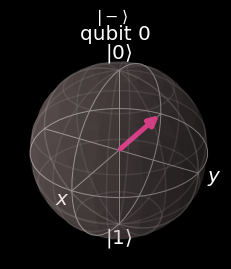

In [37]:
plus = 1 / np.sqrt(2) * (zero + one)
minus = 1 / np.sqrt(2) * (zero - one)

display(plot_bloch_multivector(Statevector(plus), title="$|+\\rangle$"))
display(plot_bloch_multivector(Statevector(minus), title="$|-\\rangle$"))

## Hadamard-operaattori $H$

Hadamardin operaattori pyörittää Blochin vektoria ensiksi $90°$ $Y$-akselin ympäri, jonka jälkeen se ottaa peilaa vektorin Blochin pallon $XY$-tason suhteen. Tätä pyöritystä voi myös ajatella $X$- ja $Z$-akselien välisen akselin ympäri $180°$ pyörityksenä.

Pyöritys voi olla hankala kuvitella, joten tutustu siihen [Blochin pallo -tilasimulaatiossa](https://bloch.ollpu.fi), painamalla `H` näppäintä.

Hadamardilla saadaan siis pyöritettyä $Z$-akselilla olevat tilat $\ket 0$ ja $\ket 1$ $X$-akselille tiloiksi $\ket +$ ja $\ket -$ vastaavasti:

$$
H\ket 0 = \ket + \\
H\ket 1 = \ket -
$$

### Hadamardilla operointi yleiselle tilalle

Hadamardilla yleisen tilan $\ket q = \alpha \ket 0 + \beta \ket 1$ kuvaus on seuraava:

$$
\begin{array}{rlll}
 & H\ket q \\
=& H \cdot \left(\alpha \ket 0 + \beta \ket 1 \right) \\
\end{array}
$$

$H$-operaattori on lineaarinen joten se voidaan tuoda sulkeiden sisälle.

$$
\begin{array}{rlll}
=& \alpha \cdot H \ket 0 &+& \beta \cdot H \ket 1 \\
=& \alpha \ket + &+& \beta \ket - \\
\end{array}
$$

## Yhden kubitin mittaus

Kvanttitietokoneessa kubitin mittaaminen ei ole mitenkään triviaali asia, koska mittaus yleensä muuttaa mitattavan systeemin, kuten kubitin, tilaa. Mittaustilanteessa kubitin sanotaan "romahtavan" _mittauskannan_ tiloihin. Esimerkiksi kubitin, joka on tilanssa $\ket 1$, mittaus aiheuttaa sen romahtavan tilaan $\ket 1$. Mitä tapahtuu kun mitataan kubitti, joka on $\ket +$ tilassa?

Mittausportti on hyvin erilainen kuin pyöritysportit. Mittausportista lähtee klassinen bitti, joka voidaan tallentaa. Mittausportin kuvake on seuraava:

![mittausportti](./images/mittaus_portti.png)

Kubittiin voidaan enkoodata ääretön määrä informaatiota, koska sen amplitudit ovat kompleksisia eli myös jatkuvia. Esimerkiksi luku 10 voidaan muuttaa binääriesitykseen ja pyörittää kubittia Blochin pallon $X$-akselin ympäri $0.1010$ radiaania.

Kyseisen tilan mittaustapahtumassa ei kuitenkaan selviä Blochin vektorin kulmia, eli kubitin amplitudeja, vaan saamme korkeintaan 1 bitin verran informaatiota, joka kertoo mihin kantatilaan kubitti romahti. Tilan romahtaessa kubitista katoaa informaatio $0.1010$ radiaanin pyörityksestä, joten seuraavista mittauksista ei selviä mitään uutta tietoa. Ainoastaan toistamalla enkoodauksen ($0.1010$ radiaanilla pyörityksen) joka mittauksen välissä voimme kerätä enemmän informaatiota kubitin tilasta.

### Mittauksen tulos

Kvanttimekaniikasta on [monta tulkintaa](https://en.wikipedia.org/wiki/Interpretations_of_quantum_mechanics), mutta tällä kurssilla tulkitaan kvantti-ilmiöitä siitä näkökulmasta, että mittaus on epädeterministinen ja romahduttaa kubitin tilan.

Ei-lomittuneen kubitin tila voidaan esittää yleisesti muodossa $\ket q = \alpha \ket 0 + \beta \ket 1$. Mittauksen tulos voidaan esittää diskreettinä todennäköisyysjakaumana seuraavasti:

$$
\begin{cases}
P(0) & = & \left|\alpha\right|^2\\
P(1) & = & \left|\beta\right|^2
\end{cases}
$$

$P(0)$ tarkoittaa todennäköisyyttä, että mittaus tuottaa tuloksen $0$. Todennäköisyysjakauman todennäköisyyksien on kaikkien oltava epänegatiivisia sekä niiden summan oltava $1$. Huomaamme tilavektorin normalisaatioehdosta $\left|\alpha\right|^2 + \left|\beta\right|^2 = 1$, että tilavektorille pätee jälkimmäinen ehto.

Todennäköisyys, että kubitti kvanttitilassa $\ket \psi$ havaitaan tilassa $\ket x$ on:

$$P(\ket x) = \left|\braket { x | \psi }\right|^2$$

Tämä on tärkeä kaava, josta voidaan todeta, että kun sisätulo tilojen välillä $\braket { x | \psi }$ on $0$, niin todennäköisyys havaita kubitti kyseisessä tilassa on $0$.

Esimerkiksi mitatessa $Z$-akselilla saadaan tilasta $\ket \psi$ mittaustulos $0$ todennäköisyydellä $\left|\braket { 0 | \psi }\right|^2$.

### Mittaus Qiskitissä

Kvanttipiiriä luodessa voidaan piiriin lisätä n.s. klassinen rekisteri syöttämällä `QuantumCircuit` funktiolle klassisten bittien lukumäärä. Esimerkiksi 2 kubitin ja 4 klassisen bitin piiri voidaan tehdä seuraavasti:

```python
circuit = QuantumCircuit(2, 4)
```

Voimme lisätä mittausportin piiriin käyttämällä metodia `measure`, jolle pitää syöttää kubitin ja klassisen bitin indeksit. Esimerkiksi ensimmäisen kubitin mittaaminen voidaan tehdä seuraavasti:

```python
circuit.measure(0, 3)
```

Yllä olevassa esimerkissä mittaustulos tallennetaan klassiseen rekisteriin indeksillä 3.

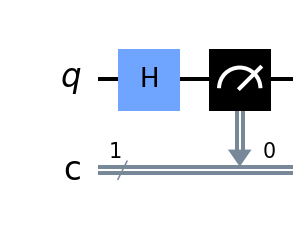

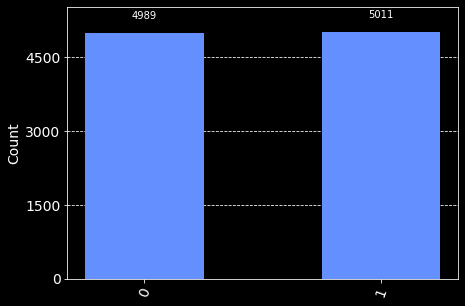

In [48]:
circuit = QuantumCircuit(1, 1)

circuit.h(0)
circuit.measure(0, 0)

display(circuit.draw(output="mpl", scale=2))

result = execute(circuit, Aer.get_backend('qasm_simulator'), shots=10000).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

Mittauksen tulokset esitetään usein pylväsdiagrammilla, jossa korkeus ilmaisee kyseisen tuloksen lukumäärän.

### Mittauskannat

Mittaus on sidottu johonkin _mittauskantaan_, joka yleensä vastaa jotain akselia Blochin pallolla. Qiskitissä mittaus tapahtuu aina $Z$-akselilla, jota kutsutaan laskennalliseksi kannaksi.

![Bloch Z-akseli](./images/bloch_z.png)

(Kuvassa punainen katkoviiva vastaa mittauskannan suuntaista komponenttia)

Hadamard-operaattorin jälkeinen tila $\ket +$ on superpositio $Z$-mittauskannassa. Mikään tila itsessään ei ole sen enemmän tai vähemmän superpositiossa, jos mittauskantaa ei ole määritelty. Esimerkiksi tila $1\cdot\ket + + 0\cdot\ket -$ ei ole superpositiossa, kun mittauskannaksi on valittu Blochin pallon $X$-akseli. Seuraava kuva esittää tilaa, joka on superpositiossa sekä $Z$-kannassa, että $X$-kannassa.

![Bloch X-akseli](./images/bloch_x.png)

Mittauksen yhteydessä kubitista menetetään kaikki sen sisältämä "kvantti-informaatio", koska kubitti ei voi enää olla superpositiossa kyseisessä mittauskannassa. Sen sijaan kubitin tila on voi olla enää yksi kahdesta tilasta.

Jotta voidaan laskea $X$-akselin mukaisen mittauksen todennäköisyysjakauma, pitää tilavektori esittää $\ket +$ ja $\ket -$ lineaarikombinaationa:

$$\ket q = \gamma \ket + + \delta \ket -$$

Tällöin mittauksesta saatu tulos $0$ vastaa tilaa $\ket +$ ja $1$ tilaa $\ket -$. $X$-akselin mittauksen jälkeen kubitti on romahtanut toiseen näistä tiloista. Esimerkiksi tila $\ket 0$ romahtaa samalla todennäköisyydellä tilaan $\ket +$ tai $\ket -$:

$$
\begin{array}{rlll}
\ket 0 & = & \frac{1}{\sqrt 2}\left(\ket + + \ket -\right) \\
\gamma & = & \sqrt{0.5} \\
\delta & = & \sqrt{0.5} \\
P(0) = P(1) & = & 0.5
\end{array}
$$

> _Mittauskannan vaihto_ täytyy tehdä pyörittämällä kubitin tila laskennalliselle kannalle sopivaksi. Esimerkiksi, jos kubitti halutaan mitata $X$-akselilla, täytyy kubittiin operoida Hadamardilla ennen ja jälkeen mittauksen.

### Toistettu mittaus

Tarkastellaan seuraavaa kvanttipiiriä.

![mittaus](./images/mittaus.png)

Piirissä kuvataan kubitin alkutila $\ket 0$ Hadamard operaattorilla tilaksi $\ket +$. $\ket +$ tila mitataan, ja tulos tallennetaan. Kutsutaan mittaustulosta, joka on yksi bitti (0 tai 1), nimellä $c_0$. Koska kubitin tila romahtaa mitatessa, on sen tila mittauksen jälkeen $\ket{c_0}$.

Seuraava mittaus on täysin riippuvainen edellisen mittauksen tuloksesta, koska kubitti on jo kantatilassa mittaukseen nähden. $c_1 = c_0$.

Kubitin tila voidaan esittää muodossa $\sqrt{c_0} \cdot \ket 0 + \sqrt{1 - c_0} \cdot \ket 1$, mutta tässä on tärkeää muistaa että $c_0$ on ajon aikana saatu mittaustulos (0 tai 1) eikä todennäköisyys tai amplitudi itsessään. Tästä syystä vältämme mittaustuloksia tilaesityksessä.

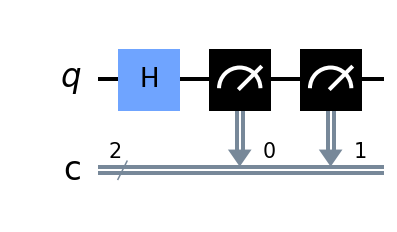

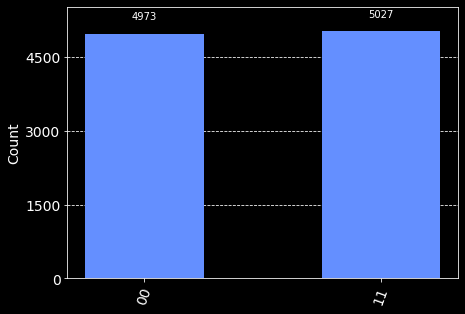

In [46]:
circuit = QuantumCircuit(1,2)

circuit.h(0)
circuit.measure(0, 0)
circuit.measure(0, 1)

display(circuit.draw(output="mpl", scale=2))

result = execute(circuit, Aer.get_backend('qasm_simulator'), shots=10000).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

Kuten tuloksista nähdään, molemmat mittaukset ($00$ tai $11$) ovat aina kaksi samaa bittiä. Jos kubitin mittaus ei romahduttaisi tilaa, näkisimme kaikkia kombinaatioita $00$, $01$, $10$ ja $11$ yhtä paljon.

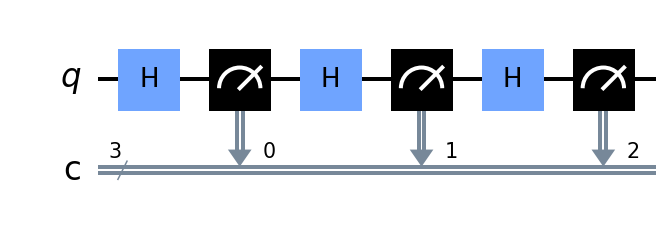

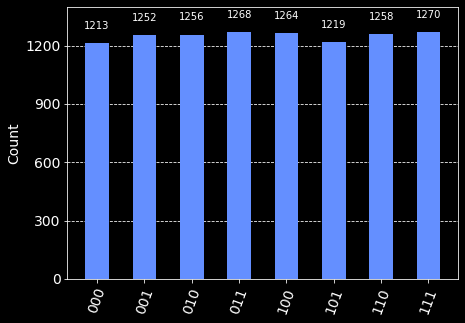

In [49]:
circuit = QuantumCircuit(1,3)

circuit.h(0)
circuit.measure(0, 0)
circuit.h(0)
circuit.measure(0, 1)
circuit.h(0)
circuit.measure(0, 2)

# Piirretään luotu piiri.
# Parametri output="mpl" kertoo, että piirto tapahtuu graafisesti.
display(circuit.draw(output="mpl", scale=2))

result = execute(circuit, Aer.get_backend('qasm_simulator'), shots=10000).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

## Kubitin tilavektori

Yleinen tilavektori $\ket \psi = \alpha \ket 0 + \beta \ket 1$ voidaan esittää matriisimuodossa seuraavasti:

$$
\ket \psi = \begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
$$

## Operaattorit matriiseina

Lineaariset operaattori voitaan myös esittää matriiseina. $X$-operaattori on matriisimuodossa:

$$
\def\x{\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}}
X = \x
$$

Hadamard operaattori on toisaalta:

$$
\def\h{\frac{1}{\sqrt 2}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}}
H = \h
$$

Matriisiesityksissä voidaan huomata, että $X$ operaattorin sarakkeista löytyy $\ket 1$ ja $\ket 0$ ja $H$:n sarakkeista $\ket +$ ja $\ket -$.

## Matriisitulo

Matriisien välisiä tuloja (vektorit ovat matriiseja myös) voidaan laskea matriisitulon laskukaavalla. Laskussa muodostuu uusi matriisi, jonka jokainen alkio on pistetulo tekijöiden riveistä ja sarakkeista.

![matriisitulo](./images/Matrix_multiplication_diagram_2.svg.png)

Tulo $X\ket 0$ voidaan laskea seuraavasti:

$$
\def\zero{\begin{pmatrix}1 \\ 0\end{pmatrix}}
\def\one{\begin{pmatrix}0 \\ 1\end{pmatrix}}
\begin{array}{rlll}
X\ket 0 &=& 
\begin{pmatrix}
{\color{red}0} & {\color{green}1} \\
{\color{blue}1} & {\color{yellow}0} \\
\end{pmatrix} \zero \\
\\
&=& \begin{pmatrix}
{\color{red}0} \cdot 1 + {\color{green}1} \cdot 0 \\
{\color{blue}1} \cdot 1 + {\color{yellow}0} \cdot 0 \\
\end{pmatrix} \\
\\
&=& \one
\end{array}
$$

Matriisitulossa pitää ottaa huomioon tekijöiden ulottuvuus. $2×2$ matriisilla voidaan kuvata toinen $2×2$ matriisi tai $2×1$ vektori, mutta ei esimerkiksi rivivektoria $1×2$.

### Matriisitulon ominaisuuksia

Matriisituloissa pitää ottaa huomioon laskujärjestys, koska tulon tekijöiden paikkaa ei voi vaihtaa. Tulossa voi kuitenkin asetella sulkeet niin kuin haluaa. Seuraavaksi on listattuna yleisiä ominaisuuksia matriisilaskuista:

$$
\begin{array}{rlll}
AB &\ne& BA
A(BC) &=& (AB)C
\end{array}
$$

Matriisitulossa tilavektori on yleensä oikealla ja operaattori tulevat järjestyksessä vasemmalle. Esimerkiksi lopputila ($\ket \psi$), joka saadaan kun $\ket 0$ tilavektori kuvataa $X$-portilla ja sen jälkeen $H$-portilla voidaan esittää seuraavasti:

$$
\ket \psi = HX\ket 0
$$

Voimme suorittaa tulosta laskun $HX$ ensiksi erikseen, jolloin saadaan koko kvanttipiirin _unitaarinen matriisi_:

$$
\begin{array}{rll}
HX &=& \h \x \\
\\
&=& \frac{1}{\sqrt 2}\begin{pmatrix}
1 & 1 \\
-1 & 1
\end{pmatrix}
\end{array}
$$